# Combining Sampling Methods with Attractor Dynamics in Spiking Models of Head-Direction Systems
## by Vojko Pjanovic, Jacob Zavatone-Veth, Paul Masset, Sander Keemink & Michele Nardin. 

Code written by Vojko Pjanovic and Michele Nardin.

This notebook includes the code for Fig. 4.

In [ ]:
WORK IN PROGRESS

TODO: clean code and add information about voltage etc.

In [ ]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [ ]:
# initialize parameters and variables
np.random.seed(0)
dt = 0.001
radius = 4
nt=20000
K = 2

r_real = np.zeros([K,nt])
rs = np.zeros([K,nt])

ang=0
r_real[:,0] = r_real[:,1]=r_real[:,2]= np.array([radius*np.cos(ang),radius*np.sin(ang)])

In [ ]:
N = 8
lam = 10

D = np.array([[np.sin(2*np.pi/N*i),np.cos(2*np.pi/N*i)] for i in range(N)])/4
T = np.diag(D @ D.T) /2

# interactions
O_f = - D @ D.T
O_s = lam * D @ D.T

def DU_xy(s_t,r_new,r_old):
    observation =  -(beta.T@(s_t.T - 1)).T/alpha  * np.flip(D.T @ r_old) * [1,-1]
    ring = - 4 * (D.T @ r_new) * ( r_new @ D @ D.T @ r_new.T - radius**2)
    return  observation + ring

In [ ]:
Nr = 20
beta = np.random.randn(int(Nr/2),1)*10
beta = np.concatenate([beta,-beta]) 

np.random.seed(0)
ang_vel=np.concatenate([[np.random.randn()]*2000 for _ in range(int((nt+1)/2000))])*0.005
ang_vel = ndi.gaussian_filter1d(ang_vel,500,axis=0)
kernel = np.exp(beta @ ang_vel.reshape(1,-1))
s = np.random.poisson(kernel) 
alpha = (1 + beta.T@beta*dt)[0,0]

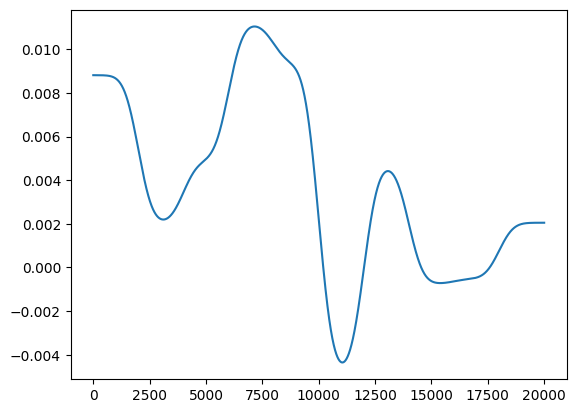

In [ ]:
plt.plot(ang_vel)

In [ ]:
V = np.zeros([N,nt])
V[:,0] = 0.95*T
sigma = np.zeros([N,nt])
r = np.zeros([N,nt])
r[:,0] = r[:,1] = r[:,2]= np.array(np.linalg.pinv(D.T)@r_real[:,0])

for t in range(2,nt-1):
    ang += ang_vel[t-1]   
    r_real[:,t] = np.array([radius*np.cos(ang),radius*np.sin(ang)])
    
    V[:, t + 1] = V[:, t] + dt * (
        - lam * V[:, t]
        + D @ DU_xy(s[:,t-1],r[:,t-1],r[:,t-2])
        + O_s @ r[:, t]
        + O_f @ sigma[:, t]
    ) + D @ (np.random.randn(K) * np.sqrt(2 * dt))

    above = np.where(V[:, t + 1] > T)[0]

    if len(above):
        sigma[above[np.random.randint(len(above))], t + 1] = 1 / dt
        # sigma[above[0], t + 1] = 1 / dt

    r[:, t + 1] = r[:, t] + dt * (sigma[:, t + 1] - lam * r[:, t])

x_y_est = D.T @ r
xs = x_y_est[0,:]
ys = x_y_est[1,:]

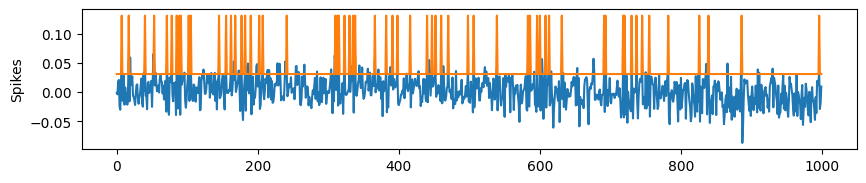

In [ ]:
# plot voltage and spikes of neuron 1
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(V[0,5000:6000])
# plt.ylabel('Voltage')
# plt.subplot(2, 1, 2)
plt.plot(sigma[0,5000:6000]/10000+T[0])
plt.ylabel('Spikes')
plt.show()

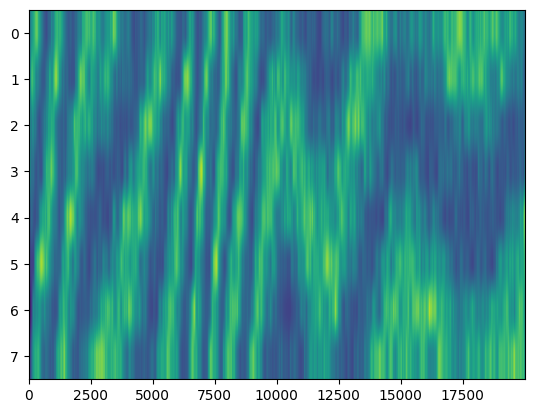

In [ ]:
plt.imshow(r,aspect='auto')

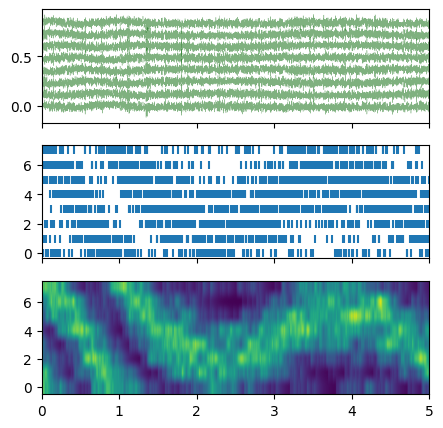

In [ ]:
beg,end = 8000,13000

plt.figure(figsize=(5,5))

plt.subplot(311)

# plot voltave traces, one on each line, from beg to end
for iv,v in enumerate(V):
    plt.plot(v[beg:end] + iv*0.12,color='darkgreen',alpha=0.5,lw=0.3)
plt.xticks(np.arange(0,end-beg+1000,1000),[])

plt.xlim(0,end-beg)

# plot sigma as in putting a small dot wherewer a spike occurs
plt.subplot(312)
x,y = np.where(sigma[:,beg:end])
plt.scatter(y,x,marker='|',rasterized=True)
plt.xticks(np.arange(0,end-beg+1000,1000),[])
plt.xlim(0,end-beg)

plt.subplot(313)
plt.imshow(r[:,beg:end],aspect='auto',origin='lower')
plt.xticks(np.arange(0,end-beg+1000,1000),np.arange(6))

plt.show()